In [56]:
# Reading the CSV file
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt



In [2]:

df = pd.read_csv('roo_data.csv')
# df.head()

Making df_converted with numerical values in the columns

In [3]:
# Converting the df to one with having numerical parameters

df_converted = df.copy()

le = preprocessing.LabelEncoder()

for i in df_converted.columns:
  if i == 'Suggested Job Role':
    continue
  if type(df_converted[i][0]) == str:
    label = le.fit_transform(df_converted[i])
    df_converted[i] = label
    # df_converted.drop(i, axis=1, inplace=True)


df_converted.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,21,1,0,1,0,0,0,1,0,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,5,1,1,0,1,0,0,0,1,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,29,0,0,1,0,1,0,0,1,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,23,0,1,0,0,1,1,1,1,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,7,1,0,1,0,1,0,1,1,Business Systems Analyst


In [ ]:
df_converted.describe().transpose()

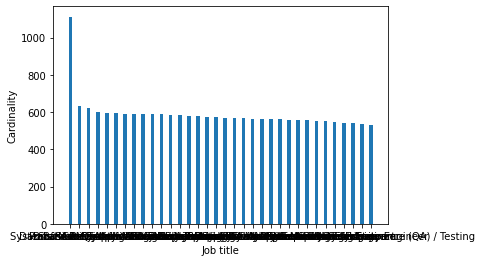

Network Security Administrator               1112
Network Security Engineer                     630
Network Engineer                              621
Project Manager                               602
Database Administrator                        593
Portal Administrator                          593
Information Technology Manager                591
Software Engineer                             590
UX Designer                                   589
Design & UX                                   588
Software Developer                            587
CRM Business Analyst                          584
Business Systems Analyst                      582
Database Developer                            581
Solutions Architect                           578
Software Systems Engineer                     575
Software Quality Assurance (QA) / Testing     571
Database Manager                              570
Web Developer                                 570
CRM Technical Developer                       567


In [58]:
# Seeing the results before changing the last column

y11=df_converted['Suggested Job Role'].value_counts()
x11=df_converted['Suggested Job Role'].unique()



plt.bar(x11, y11, width = 0.4)
 
plt.xlabel("Job title")
plt.ylabel("Cardinality")
plt.show()

y11

In [59]:
# Model of unmodified target column:

# Setting the target column and the feature columns
target_col = ['Suggested Job Role',]

prediction_cols = list(df_converted.columns)
prediction_cols.remove('Suggested Job Role')
# prediction_cols

# Splitting into train and test data

X = df_converted[prediction_cols].values
Y = df_converted[target_col].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)
print(X_train.shape); print(X_test.shape)

# Creating the model
classifier = MLPClassifier(max_iter=1000)
classifier.fit(X_train, Y_train.ravel())
accuracy = classifier.score(X_test, Y_test)


print("The accuracy of the model is:", accuracy)

# print()

# pred = classifier.predict(X_test)
# print(confusion_matrix(Y_test, pred))

(14000, 38)
(6000, 38)
The accuracy of the model is: 0.03716666666666667


Making df_dept, with modified output column

In [4]:
# Creating a new dataframe with updated values of last column

df_dept = df_converted.copy()
df_dept.rename(columns = {'Suggested Job Role':'Department'}, inplace = True)


networks = ['Network Security Administrator', 'Network Security Engineer', 'Network Engineer', 'Information Security Analyst']
database = ['Database Administrator', 'Portal Administrator', 'Database Developer', 'Database Manager', 'Data Architect']
systems = ['Software Systems Engineer', 'Systems Security Administrator', 'Technical Engineer', 'Systems Analyst']
technical_assistance = ['Technical Support', 'Technical Services/Help Desk/Tech Support', 'Quality Assurance Associate']
development_and_design = ['UX Designer', 'Design & UX', 'Web Developer', 'CRM Technical Developer', 'Applications Developer', 'Mobile Applications Developer']
business_and_management = ['Project Manager', 'Information Technology Manager', 'CRM Business Analyst', 'Business Systems Analyst', 'Business Intelligence Analyst', 'E-Commerce Analyst']
general_software = ['Software Engineer', 'Software Developer', 'Solutions Architect', 'Software Quality Assurance (QA) / Testing', 'Information Technology Auditor', 'Programmer Analyst']

df_dept.replace(networks, 'Network', inplace=True)
df_dept.replace(database, 'Database', inplace=True)
df_dept.replace(systems, 'Systems', inplace=True)
df_dept.replace(technical_assistance, 'Technical Assistance', inplace=True)
df_dept.replace(development_and_design, 'Design and Development', inplace=True)
df_dept.replace(business_and_management, 'Business and Management', inplace=True)
df_dept.replace(general_software, 'General Software', inplace=True)

df_dept.head()


,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Department
0,69,63,78,87,94,94,87,84,61,9,...,21,1,0,1,0,0,0,1,0,Database
1,78,62,73,60,71,70,73,84,91,12,...,5,1,1,0,1,0,0,0,1,Database
2,71,86,91,87,61,81,72,72,94,11,...,29,0,0,1,0,1,0,0,1,Database
3,76,87,60,84,89,73,62,88,69,7,...,23,0,1,0,0,1,1,1,1,Systems
4,92,62,90,67,71,89,73,71,73,4,...,7,1,0,1,0,1,0,1,1,Business and Management


Default Model for All Columns

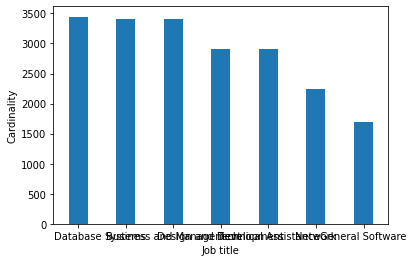

Business and Management    3445
General Software           3413
Design and Development     3403
Network                    2906
Database                   2901
Systems                    2244
Technical Assistance       1688
Name: Department, dtype: int64

In [62]:
# Seeing the results of target column after changing the last column

y11=df_dept['Department'].value_counts()
x11=df_dept['Department'].unique()



plt.bar(x11, y11, width = 0.4)
 
plt.xlabel("Job title")
plt.ylabel("Cardinality")
plt.show()

y11

In [64]:
# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df_dept.columns)
prediction_cols.remove('Department')
# prediction_cols

In [65]:
# Splitting into train and test data

X = df_dept[prediction_cols].values
Y = df_dept[target_col].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)
print(X_train.shape); print(X_test.shape)

(14000, 38)
(6000, 38)


In [66]:
# Creating the model
classifier = MLPClassifier(max_iter=1000)
classifier.fit(X_train, Y_train.ravel())
accuracy = classifier.score(X_test, Y_test)


print("The accuracy of the model is:", accuracy)

# print()

# pred = classifier.predict(X_test)
# print(confusion_matrix(Y_test, pred))

The accuracy of the model is: 0.14833333333333334


Dropping a few columns which might be irrelevant

In [5]:
df1 = df_dept.copy()
print(df1.shape)

drop_cols = ['In a Realtionship?', 'Introvert', 'talenttests taken?', 'olympiads', 'interested in games', 'Interested Type of Books']
df1.drop(drop_cols, axis=1, inplace=True)

print(df1.shape)
df1.columns

(20000, 39)
(20000, 33)


Index(['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Salary Range Expected',
       'Gentle or Tuff behaviour?', 'Management or Technical', 'Salary/work',
       'hard/smart worker', 'worked in

Again running the model on remaining columns

In [68]:
# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')


# Splitting into train and test data

X = df1[prediction_cols].values
Y = df1[target_col].values
s=0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)
print(X_train.shape); print(X_test.shape)

for i in range(10):
    classifier = MLPClassifier(max_iter=1000)
    classifier.fit(X_train, Y_train.ravel())
    accuracy = classifier.score(X_test, Y_test)
    s+=accuracy


    print("The accuracy of the model is:", accuracy)

print('Average accurace:', s/10)
# print()

# pred = classifier.predict(X_test)
# print(confusion_matrix(Y_test, pred))

(14000, 32)
(6000, 32)
The accuracy of the model is: 0.167
The accuracy of the model is: 0.163
The accuracy of the model is: 0.14183333333333334
The accuracy of the model is: 0.16683333333333333
The accuracy of the model is: 0.147
The accuracy of the model is: 0.15566666666666668
The accuracy of the model is: 0.14816666666666667
The accuracy of the model is: 0.17283333333333334
The accuracy of the model is: 0.16883333333333334
The accuracy of the model is: 0.16766666666666666
Average accurace: 0.15988333333333335


Adding a few parameters to the MPLClassifier

In [69]:
# Adding 3 Hidden Layers
# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')


# Splitting into train and test data

X = df1[prediction_cols].values
Y = df1[target_col].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
# print(X_train.shape); print(X_test.shape)
s=0
for i in range(10):
    classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
    classifier.fit(X_train, Y_train.ravel())
    accuracy = classifier.score(X_test, Y_test)
    s+=accuracy

    print("The accuracy of the model is:", accuracy)

print('Average Accuracy:', s/10)

# print()

# pred = classifier.predict(X_test)
# print(confusion_matrix(Y_test, pred))

The accuracy of the model is: 0.171
The accuracy of the model is: 0.16933333333333334
The accuracy of the model is: 0.16683333333333333
The accuracy of the model is: 0.16066666666666668
The accuracy of the model is: 0.165
The accuracy of the model is: 0.16233333333333333
The accuracy of the model is: 0.16866666666666666
The accuracy of the model is: 0.167
The accuracy of the model is: 0.1665
The accuracy of the model is: 0.16866666666666666
Average Accuracy: 0.16660000000000003


In [70]:
# Adding 4 Hidden Layers
# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')


# Splitting into train and test data

X = df1[prediction_cols].values
Y = df1[target_col].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
# print(X_train.shape); print(X_test.shape)
s=0
for i in range(10):
    classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
    classifier.fit(X_train, Y_train.ravel())
    accuracy = classifier.score(X_test, Y_test)
    s+=accuracy

    print("The accuracy of the model is:", accuracy)

print('Average Accuracy:', s/10)

# print()

# pred = classifier.predict(X_test)
# print(confusion_matrix(Y_test, pred))

The accuracy of the model is: 0.17316666666666666
The accuracy of the model is: 0.16433333333333333
The accuracy of the model is: 0.16583333333333333
The accuracy of the model is: 0.166
The accuracy of the model is: 0.17
The accuracy of the model is: 0.17416666666666666
The accuracy of the model is: 0.1645
The accuracy of the model is: 0.16683333333333333
The accuracy of the model is: 0.1655
The accuracy of the model is: 0.1625
Average Accuracy: 0.16728333333333337


Random Sampling for features

In [71]:
# Setting the target column and the feature columns
target_col = ['Department',]



# Selecting 5 random columns:
i=0
while i<20:
    
    df2 = df1.sample(n=5, axis='columns')
    if 'Department' in df2.columns:
        continue
    else:
        print("Round #", i)
        prediction_cols = list(df2.columns)
        print('The columns randomly selected are:')
        print(prediction_cols)
        X = df2[prediction_cols].values
        Y = df1[target_col].values

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
        classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
        classifier.fit(X_train, Y_train.ravel())
        accuracy = classifier.score(X_test, Y_test)

        print("The accuracy of the model is:", accuracy)
        i+=1
        print()
        



Round # 0
The columns randomly selected are:
['Gentle or Tuff behaviour?', 'Percentage in Programming Concepts', 'Percentage in Computer Architecture', 'coding skills rating', 'Salary Range Expected']
The accuracy of the model is: 0.16816666666666666

Round # 1
The columns randomly selected are:
['hackathons', 'Percentage in Programming Concepts', 'worked in teams ever?', 'Job/Higher Studies?', 'Salary/work']
The accuracy of the model is: 0.16666666666666666

Round # 2
The columns randomly selected are:
['Percentage in Computer Networks', 'coding skills rating', 'Percentage in Electronics Subjects', 'Interested subjects', 'certifications']
The accuracy of the model is: 0.17366666666666666

Round # 3
The columns randomly selected are:
['hard/smart worker', 'Percentage in Computer Architecture', 'Type of company want to settle in?', 'Percentage in Computer Networks', 'Percentage in Communication skills']
The accuracy of the model is: 0.16383333333333333

Round # 4
The columns randomly se

Trying Feature Engineering

Using SelectKBest

In [83]:
# Using chi2 as a scoring function

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array


# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')

X = df1[prediction_cols].values
Y = df1[target_col].values

# Selecting 5 random columns:
select = SelectKBest(score_func=chi2, k=5)
X1 = select.fit_transform(X, Y)
filter = select.get_support(indices=True)
print('The columns selected using SelectKBest are:')
print(df1.columns[filter])


s=0
i=0
while i<3:
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.30, random_state=40)
    classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000)
    classifier.fit(X_train, Y_train.ravel())
    accuracy = classifier.score(X_test, Y_test)
    s+=accuracy
    print("The accuracy of the model is:", accuracy)
    i+=1
    print()


print('Average Accuracy:', s/3)
        

The columns selected using SelectKBest are:
Index(['Logical quotient rating', 'hackathons', 'public speaking points',
       'workshops', 'Type of company want to settle in?'],
      dtype='object')
The accuracy of the model is: 0.17266666666666666

The accuracy of the model is: 0.16683333333333333

The accuracy of the model is: 0.16533333333333333

Average Accuracy: 0.16827777777777778


In [85]:
# Using f_classif as a scoring function

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import array


# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')

X = df1[prediction_cols].values
Y = df1[target_col].values

# Selecting 5 random columns:
select = SelectKBest(score_func=f_classif, k=5)
X1 = select.fit_transform(X, Y)
filter = select.get_support(indices=True)
print('The columns selected using SelectKBest are:')
print(df1.columns[filter])


s=0
i=0
while i<3:
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.30, random_state=40)
    classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000)
    classifier.fit(X_train, Y_train.ravel())
    accuracy = classifier.score(X_test, Y_test)

    print("The accuracy of the model is:", accuracy)
    s+=accuracy
    i+=1
    print()
        
print('Average Accuracy:', s/3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The columns selected using SelectKBest are:
Index(['hackathons', 'public speaking points', 'self-learning capability?',
       'Salary/work', 'worked in teams ever?'],
      dtype='object')
The accuracy of the model is: 0.17066666666666666

The accuracy of the model is: 0.16716666666666666

The accuracy of the model is: 0.1685

Average Accuracy: 0.16877777777777778


Changing a few parameters of the MLPClassifier

In [81]:
# Using chi2 as a scoring function and lbfgs solver

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array


# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')

X = df1[prediction_cols].values
Y = df1[target_col].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Selecting 5 random columns:
select = SelectKBest(score_func=chi2, k=5)
X1 = select.fit_transform(X, Y)
filter = select.get_support(indices=True)
print('The columns selected using SelectKBest are:')
print(df1.columns[filter])


s=0
i=0
while i<1:
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.30, random_state=40)
    classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000, solver='lbfgs')
    classifier.fit(X_train, Y_train.ravel())
    accuracy = classifier.score(X_test, Y_test)
    s+=accuracy
    print("The accuracy of the model is:", accuracy)
    i+=1
    print()



The columns selected using SelectKBest are:
Index(['self-learning capability?', 'Job/Higher Studies?', 'Salary/work',
       'hard/smart worker', 'worked in teams ever?'],
      dtype='object')
The accuracy of the model is: 0.17233333333333334



In [40]:
# Using chi2 as a scoring function and sgd solver

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array


# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')

X = df1[prediction_cols].values
Y = df1[target_col].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Selecting 5 random columns:
select = SelectKBest(score_func=chi2, k=5)
X1 = select.fit_transform(X, Y)
filter = select.get_support(indices=True)
print('The columns selected using SelectKBest are:')
print(df1.columns[filter])


s=0
i=0
while i<1:
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.30, random_state=40)
    classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000, solver='sgd')
    classifier.fit(X_train, Y_train.ravel())
    accuracy = classifier.score(X_test, Y_test)
    s+=accuracy
    print("The accuracy of the model is:", accuracy)
    i+=1
    print()



The columns selected using SelectKBest are:
Index(['self-learning capability?', 'Job/Higher Studies?', 'Salary/work',
       'hard/smart worker', 'worked in teams ever?'],
      dtype='object')
The accuracy of the model is: 0.16566666666666666



In [41]:
# Using chi2 as a scoring function, lbfgs solver, identity activation

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array


# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')

X = df1[prediction_cols].values
Y = df1[target_col].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Selecting 5 random columns:
select = SelectKBest(score_func=chi2, k=5)
X1 = select.fit_transform(X, Y)
filter = select.get_support(indices=True)
print('The columns selected using SelectKBest are:')
print(df1.columns[filter])


s=0
i=0
while i<1:
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.30, random_state=40)
    classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000, solver='lbfgs', activation='identity')
    classifier.fit(X_train, Y_train.ravel())
    accuracy = classifier.score(X_test, Y_test)
    s+=accuracy
    print("The accuracy of the model is:", accuracy)
    i+=1
    print()



The columns selected using SelectKBest are:
Index(['self-learning capability?', 'Job/Higher Studies?', 'Salary/work',
       'hard/smart worker', 'worked in teams ever?'],
      dtype='object')
The accuracy of the model is: 0.17066666666666666



In [45]:
# Using chi2 as a scoring function, lbfgs solver, logistic activation

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array


# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')

X = df1[prediction_cols].values
Y = df1[target_col].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Selecting 5 random columns:
select = SelectKBest(score_func=chi2, k=5)
X1 = select.fit_transform(X, Y)
filter = select.get_support(indices=True)
print('The columns selected using SelectKBest are:')
print(df1.columns[filter])


s=0
i=0
while i<1:
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.30, random_state=40)
    classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000, solver='lbfgs', activation='logistic')
    classifier.fit(X_train, Y_train.ravel())
    accuracy = classifier.score(X_test, Y_test)
    s+=accuracy
    print("The accuracy of the model is:", accuracy)
    i+=1
    print()



The columns selected using SelectKBest are:
Index(['self-learning capability?', 'Job/Higher Studies?', 'Salary/work',
       'hard/smart worker', 'worked in teams ever?'],
      dtype='object')
The accuracy of the model is: 0.16433333333333333



In [47]:
# Using chi2 as a scoring function, lbfgs solver, tanh activation

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array


# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')

X = df1[prediction_cols].values
Y = df1[target_col].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Selecting 5 random columns:
select = SelectKBest(score_func=chi2, k=5)
X1 = select.fit_transform(X, Y)
filter = select.get_support(indices=True)
print('The columns selected using SelectKBest are:')
print(df1.columns[filter])


s=0
i=0
while i<1:
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.30, random_state=40)
    classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000, solver='lbfgs', activation='tanh')
    classifier.fit(X_train, Y_train.ravel())
    accuracy = classifier.score(X_test, Y_test)
    s+=accuracy
    print("The accuracy of the model is:", accuracy)
    i+=1
    print()



The columns selected using SelectKBest are:
Index(['self-learning capability?', 'Job/Higher Studies?', 'Salary/work',
       'hard/smart worker', 'worked in teams ever?'],
      dtype='object')
The accuracy of the model is: 0.175



Changing test train split

The columns selected using SelectKBest are:
Index(['self-learning capability?', 'Job/Higher Studies?', 'Salary/work',
       'hard/smart worker', 'worked in teams ever?'],
      dtype='object')
The accuracy of the model is: 0.17133333333333334

[[ 28  20  32  33  29  21  36]
 [  0   0   0   0   0   0   0]
 [282 237 344 290 158 263 336]
 [230 181 268 271 120 280 273]
 [  0   0   0   0   0   0   0]
 [ 36  16  33  37  11  33  26]
 [298 207 369 355 184 311 352]]

Classwise Accuracies:
Database :    0.1407035175879397
Systems :    nan
Business and Management :    0.18010471204188483
Design and Development :    0.16697473813924832
Technical Assistance :    nan
Network :    0.171875
General Software :    0.16955684007707128


/var/folders/mp/wx2sht3d3b335pkjlr_hsqy00000gn/T/ipykernel_11629/3972131.py:54: RuntimeWarning: invalid value encountered in true_divide
  class_wise_acc = confusion_mat.diagonal()/confusion_mat.sum(axis=1)


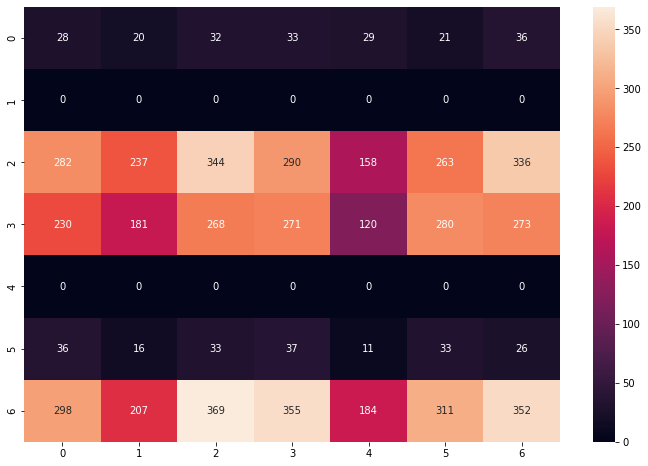

In [90]:
# 70-30 train-test split
# Using chi2 as a scoring function, lbfgs solver, tanh activation

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array


# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')

X = df1[prediction_cols].values
Y = df1[target_col].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Selecting 5 random columns:
select = SelectKBest(score_func=chi2, k=5)
X1 = select.fit_transform(X, Y)
filter = select.get_support(indices=True)
print('The columns selected using SelectKBest are:')
print(df1.columns[filter])


s=0
i=0
# while i<1:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.30, random_state=40)
classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000, solver='lbfgs', activation='tanh')
classifier.fit(X_train, Y_train.ravel())
accuracy = classifier.score(X_test, Y_test)
s+=accuracy
print("The accuracy of the model is:", accuracy)
i+=1
print()
lab=df1['Department'].unique()
prediction = classifier.predict(X_test)
confusion_mat=confusion_matrix(prediction, Y_test, labels=lab)

print(confusion_mat)

# Plotting confusion matrix
import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(confusion_mat, annot=True, fmt='d')

# Plotting Classwise Accuracies:
print('\nClasswise Accuracies:')
class_wise_acc = confusion_mat.diagonal()/confusion_mat.sum(axis=1)
for i in range(len(lab)):
    print(lab[i], ':   ', class_wise_acc[i])

The columns selected using SelectKBest are:
Index(['self-learning capability?', 'Job/Higher Studies?', 'Salary/work',
       'hard/smart worker', 'worked in teams ever?'],
      dtype='object')
The accuracy of the model is: 0.172875

[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [426 336 489 460 250 377 475]
 [387 296 444 465 215 405 456]
 [  0   0   0   0   0   0   0]
 [ 70  46  94  84  41  83  80]
 [304 202 351 346 166 306 346]]

Classwise Accuracies:
Database :    nan
Systems :    nan
Business and Management :    0.17383576253110558
Design and Development :    0.174287856071964
Technical Assistance :    nan
Network :    0.16666666666666666
General Software :    0.17120237506185057


/var/folders/mp/wx2sht3d3b335pkjlr_hsqy00000gn/T/ipykernel_11629/2186655410.py:54: RuntimeWarning: invalid value encountered in true_divide
  class_wise_acc = confusion_mat.diagonal()/confusion_mat.sum(axis=1)


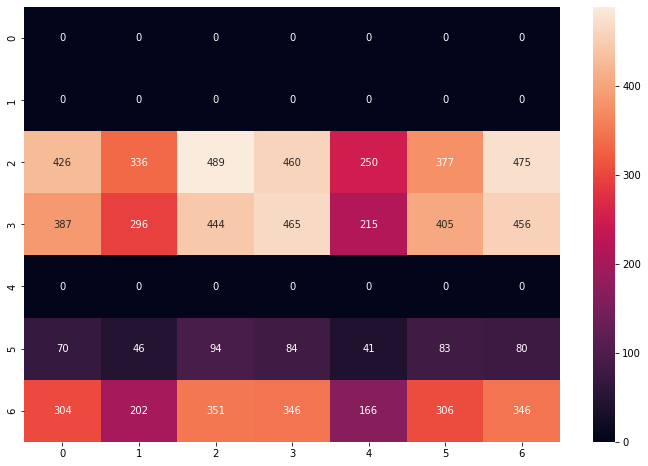

In [91]:
# 60-40 train-test split
# Using chi2 as a scoring function, lbfgs solver, tanh activation

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array


# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')

X = df1[prediction_cols].values
Y = df1[target_col].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Selecting 5 random columns:
select = SelectKBest(score_func=chi2, k=5)
X1 = select.fit_transform(X, Y)
filter = select.get_support(indices=True)
print('The columns selected using SelectKBest are:')
print(df1.columns[filter])


s=0
i=0
# while i<1:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.40, random_state=40)
classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000, solver='lbfgs', activation='tanh')
classifier.fit(X_train, Y_train.ravel())
accuracy = classifier.score(X_test, Y_test)
s+=accuracy
print("The accuracy of the model is:", accuracy)
i+=1
print()
lab=df1['Department'].unique()
prediction = classifier.predict(X_test)
confusion_mat=confusion_matrix(prediction, Y_test, labels=lab)

print(confusion_mat)

# Plotting confusion matrix
import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(confusion_mat, annot=True, fmt='d')

# Plotting Classwise Accuracies:
print('\nClasswise Accuracies:')
class_wise_acc = confusion_mat.diagonal()/confusion_mat.sum(axis=1)
for i in range(len(lab)):
    print(lab[i], ':   ', class_wise_acc[i])

The columns selected using SelectKBest are:
Index(['self-learning capability?', 'Job/Higher Studies?', 'Salary/work',
       'hard/smart worker', 'worked in teams ever?'],
      dtype='object')
The accuracy of the model is: 0.17325

[[ 15  10  18  22  21  16  23]
 [  0   0   0   0   0   0   0]
 [184 166 236 189 106 175 221]
 [179 135 195 206  97 200 189]
 [  0   0   0   0   0   0   0]
 [ 26  13  25  29   5  21  19]
 [185 121 227 207 110 194 215]]

Classwise Accuracies:
Database :    0.12
Systems :    nan
Business and Management :    0.18480814408770557
Design and Development :    0.17152373022481265
Technical Assistance :    nan
Network :    0.15217391304347827
General Software :    0.17077045274027006


/var/folders/mp/wx2sht3d3b335pkjlr_hsqy00000gn/T/ipykernel_11629/4184656085.py:54: RuntimeWarning: invalid value encountered in true_divide
  class_wise_acc = confusion_mat.diagonal()/confusion_mat.sum(axis=1)


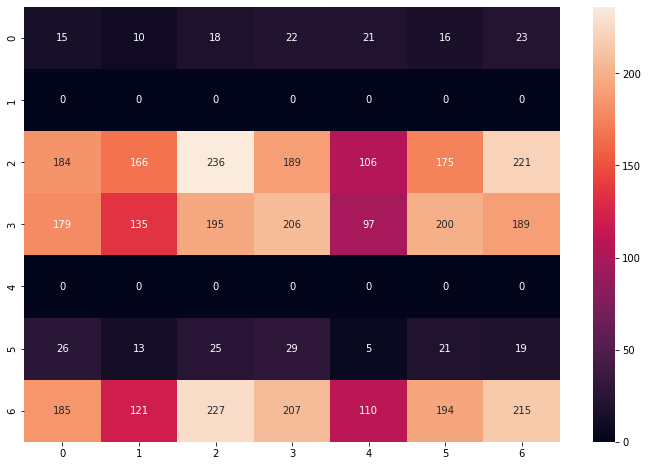

In [92]:
# 80-20 train-test split
# Using chi2 as a scoring function, lbfgs solver, tanh activation

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array


# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')

X = df1[prediction_cols].values
Y = df1[target_col].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Selecting 5 random columns:
select = SelectKBest(score_func=chi2, k=5)
X1 = select.fit_transform(X, Y)
filter = select.get_support(indices=True)
print('The columns selected using SelectKBest are:')
print(df1.columns[filter])


s=0
i=0
# while i<1:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.20, random_state=40)
classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000, solver='lbfgs', activation='tanh')
classifier.fit(X_train, Y_train.ravel())
accuracy = classifier.score(X_test, Y_test)
s+=accuracy
print("The accuracy of the model is:", accuracy)
i+=1
print()
lab=df1['Department'].unique()
prediction = classifier.predict(X_test)
confusion_mat=confusion_matrix(prediction, Y_test, labels=lab)

print(confusion_mat)

# Plotting confusion matrix
import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(confusion_mat, annot=True, fmt='d')

# Plotting Classwise Accuracies:
print('\nClasswise Accuracies:')
class_wise_acc = confusion_mat.diagonal()/confusion_mat.sum(axis=1)
for i in range(len(lab)):
    print(lab[i], ':   ', class_wise_acc[i])

The columns selected using SelectKBest are:
Index(['self-learning capability?', 'Job/Higher Studies?', 'Salary/work',
       'hard/smart worker', 'worked in teams ever?'],
      dtype='object')
The accuracy of the model is: 0.169

[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [ 99  81 118  83  51  93 121]
 [123  89 117 122  55 119 107]
 [  0   0   0   0   0   0   0]
 [  8   5  13   3   5  16  10]
 [ 98  60 104  85  55  78  82]]

Classwise Accuracies:
Database :    nan
Systems :    nan
Business and Management :    0.1826625386996904
Design and Development :    0.16666666666666666
Technical Assistance :    nan
Network :    0.26666666666666666
General Software :    0.14590747330960854


/var/folders/mp/wx2sht3d3b335pkjlr_hsqy00000gn/T/ipykernel_11629/1558276798.py:54: RuntimeWarning: invalid value encountered in true_divide
  class_wise_acc = confusion_mat.diagonal()/confusion_mat.sum(axis=1)


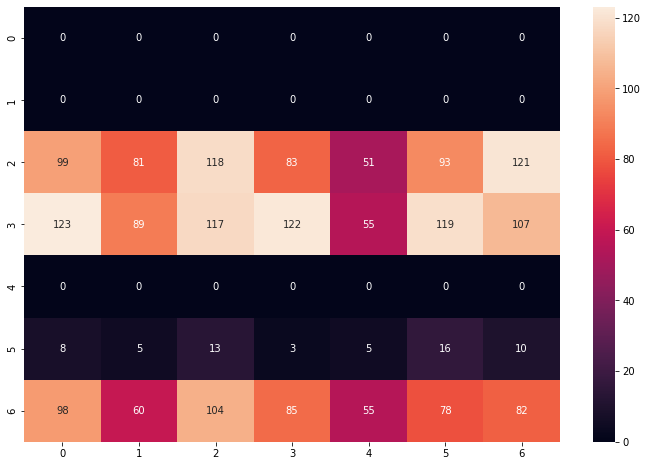

In [93]:
# 90-10 train-test split
# Using chi2 as a scoring function, lbfgs solver, tanh activation

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array


# Setting the target column and the feature columns
target_col = ['Department',]

prediction_cols = list(df1.columns)
prediction_cols.remove('Department')

X = df1[prediction_cols].values
Y = df1[target_col].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Selecting 5 random columns:
select = SelectKBest(score_func=chi2, k=5)
X1 = select.fit_transform(X, Y)
filter = select.get_support(indices=True)
print('The columns selected using SelectKBest are:')
print(df1.columns[filter])


s=0
i=0
# while i<1:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.10, random_state=40)
classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000, solver='lbfgs', activation='tanh')
classifier.fit(X_train, Y_train.ravel())
accuracy = classifier.score(X_test, Y_test)
s+=accuracy
print("The accuracy of the model is:", accuracy)
i+=1
print()
lab=df1['Department'].unique()
prediction = classifier.predict(X_test)
confusion_mat=confusion_matrix(prediction, Y_test, labels=lab)

print(confusion_mat)

# Plotting confusion matrix
import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(confusion_mat, annot=True, fmt='d')

# Plotting Classwise Accuracies:
print('\nClasswise Accuracies:')
class_wise_acc = confusion_mat.diagonal()/confusion_mat.sum(axis=1)
for i in range(len(lab)):
    print(lab[i], ':   ', class_wise_acc[i])

Relation with Assignment 1

The accuracy of the model is: 0.167

[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [102  82 118  83  49  93 119]
 [ 93  76  89 101  47 100  94]
 [  0   0   0   0   0   0   0]
 [ 19  11  26  18   8  27  19]
 [114  66 119  91  62  86  88]]

Classwise Accuracies:
Database :    nan
Systems :    nan
Business and Management :    0.1826625386996904
Design and Development :    0.16833333333333333
Technical Assistance :    nan
Network :    0.2109375
General Software :    0.14057507987220447


/var/folders/mp/wx2sht3d3b335pkjlr_hsqy00000gn/T/ipykernel_11629/986369164.py:48: RuntimeWarning: invalid value encountered in true_divide
  class_wise_acc = confusion_mat.diagonal()/confusion_mat.sum(axis=1)


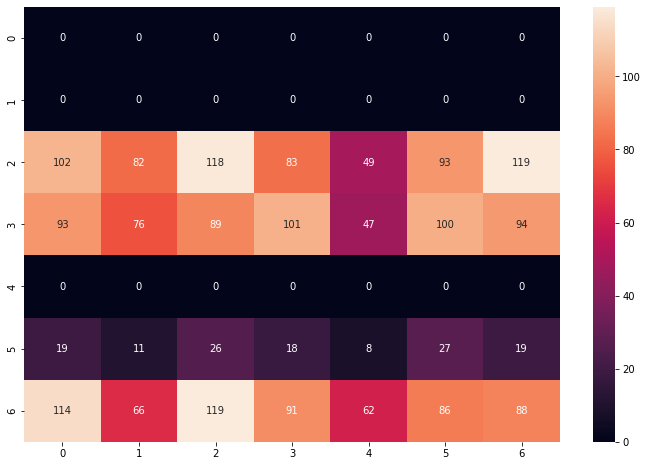

In [104]:
df3 = df_dept.copy()

acceptable_cols = ['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Department']

for i in df3.columns:
    if i not in acceptable_cols:
        df3.drop([i], axis=1, inplace=True)


target_col = ['Department',]

prediction_cols = list(df3.columns)
prediction_cols.remove('Department')

X = df3[prediction_cols].values
Y = df3[target_col].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.10, random_state=40)
classifier = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000, solver='lbfgs', activation='tanh')
classifier.fit(X_train, Y_train.ravel())
accuracy = classifier.score(X_test, Y_test)
s+=accuracy
print("The accuracy of the model is:", accuracy)

print()
lab=df1['Department'].unique()
prediction = classifier.predict(X_test)
confusion_mat=confusion_matrix(prediction, Y_test, labels=lab)

print(confusion_mat)

# Plotting confusion matrix
import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(confusion_mat, annot=True, fmt='d')

# Plotting Classwise Accuracies:
print('\nClasswise Accuracies:')
class_wise_acc = confusion_mat.diagonal()/confusion_mat.sum(axis=1)
for i in range(len(lab)):
    print(lab[i], ':   ', class_wise_acc[i])
